<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas_esericizi/blob/main/esercitazione_2_classroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
%matplotlib inline

import pandas as pd
import geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/es 11 01/Limiti01012022 (1)/Com01012022")
comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
0,1,1,1,201,201,1077,001077,Chiaverano,None,0,1.202212e+07,18164.236621,"POLYGON ((414358.390 5042001.044, 414381.796 5..."
1,1,1,1,201,201,1079,001079,Chiesanuova,None,0,4.118911e+06,10777.318814,"POLYGON ((394621.039 5031581.116, 394716.100 5..."
2,1,1,1,201,201,1089,001089,Coazze,None,0,5.657268e+07,41591.122092,"POLYGON ((364914.897 4993224.894, 364929.991 4..."
3,1,1,1,201,201,1006,001006,Almese,None,0,1.787564e+07,17058.439037,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
4,1,1,1,201,201,1007,001007,Alpette,None,0,5.626076e+06,9795.562269,"POLYGON ((388890.737 5030465.123, 388945.987 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,2,5,26,0,26,26096,026096,Pieve del Grappa,None,0,3.733847e+07,33907.733890,"POLYGON ((720049.250 5087017.160, 720076.250 5..."
7900,2,4,22,0,22,22167,022167,San Michele all'Adige,None,0,1.599623e+07,26368.864693,"POLYGON ((667690.769 5121538.436, 667726.269 5..."
7901,1,3,15,215,215,15251,015251,Vermezzo con Zelo,None,0,1.073678e+07,21854.020935,"POLYGON ((498700.765 5028780.650, 498917.702 5..."
7902,2,4,22,0,22,22254,022254,Ville di Fiemme,None,0,4.614933e+07,42004.727128,"POLYGON ((692073.476 5137147.812, 692107.476 5..."


In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/es 11 01/Limiti01012022 (1)/ProvCM01012022")
province

In [ ]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/es 11 01/Limiti01012022 (1)/Reg01012022")
regioni

In [ ]:
ripGep = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/es 11 01/Limiti01012022 (1)/RipGeo01012022")
ripGep

1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [ ]:
!pip install contextily
import contextily

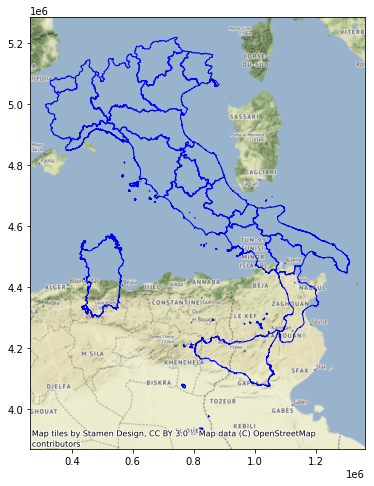

In [ ]:
ax = regioni.plot(figsize = (6,12), facecolor = 'None', edgecolor = 'Blue')
contextily.add_basemap(ax)

In [ ]:
#regioni.crs

In [ ]:
regioni3857 = regioni.to_crs(epsg = 3857) #3857 di base

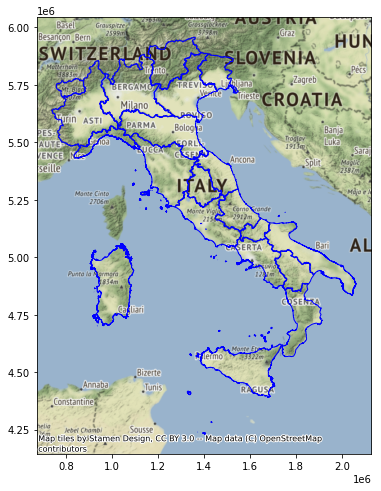

In [ ]:
import contextily
ax = regioni3857.plot(figsize = (6,12), facecolor = 'None', edgecolor = 'Blue')
contextily.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa
(https://contextily.readthedocs.io/en/latest/providers_deepdive.html)

In [ ]:
import contextily as ctx
import xyzservices.providers as xyz

import matplotlib.pyplot as plt

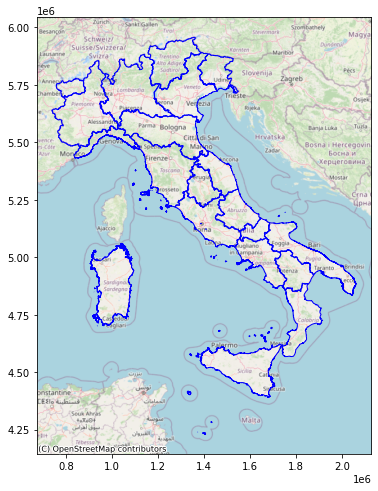

In [ ]:
ax = regioni3857.plot(figsize = (6,12), facecolor = 'None', edgecolor = 'Blue')
contextily.add_basemap(ax, source=xyz.OpenStreetMap.Mapnik)

3. visualizzare le province della Lombardia su una mappa di contextily

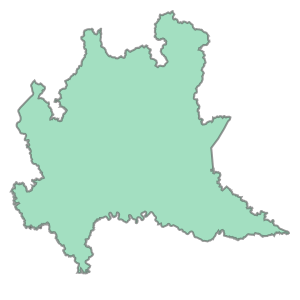

In [ ]:
Lombardia = regioni[regioni['DEN_REG'] == 'Lombardia'].geometry.item() #.item trasforma in una figura geometrica
Lombardia

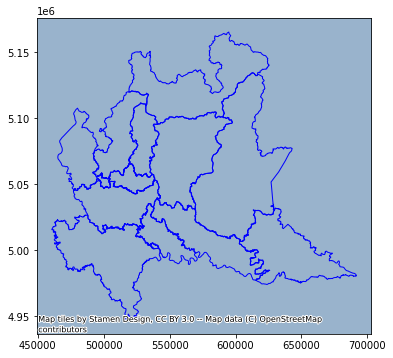

In [ ]:
provincie_lombardia = province[province.within(Lombardia)]

ax = provincie_lombardia.plot(figsize = (6,12), facecolor = 'None', edgecolor = 'Blue')
contextily.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

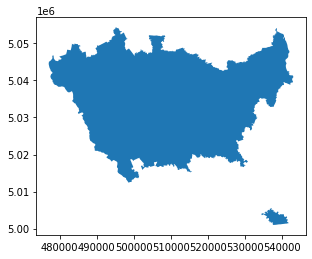

In [ ]:
provinciaMilano = province[province['DEN_UTS']=='Milano']
provinciaMilano.plot()

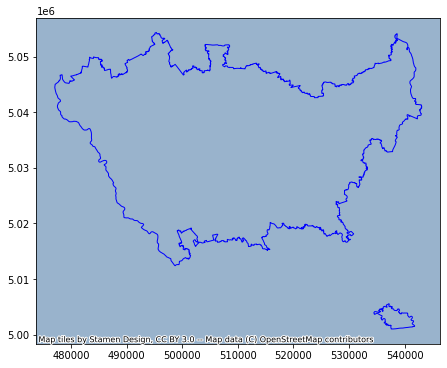

In [ ]:
ax = provinciaMilano.plot(figsize = (12, 6), edgecolor = 'Blue', facecolor = 'None')
contextily.add_basemap(ax)

In [ ]:
provincia_milano3857 = provinciaMilano.to_crs(epsg = 3857)

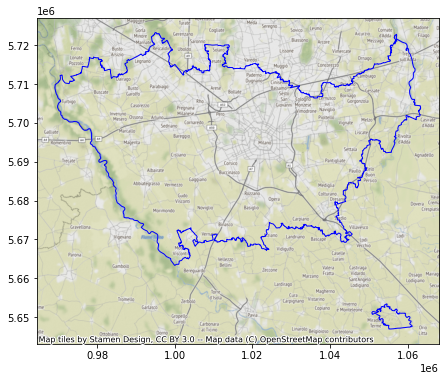

In [ ]:
ax = provincia_milano3857.plot(figsize = (12, 6), edgecolor = 'Blue', facecolor = 'None')
contextily.add_basemap(ax)

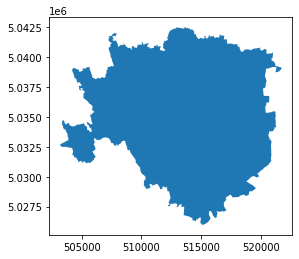

In [ ]:
comuni_milano = comuni[comuni['COMUNE'] == 'Milano']
comuni_milano.plot()

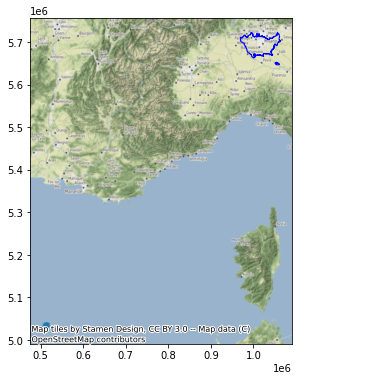

In [ ]:
ax = provincia_milano3857.plot(figsize = (12, 6), edgecolor = 'Blue', facecolor = 'None')
comuni_milano.plot(ax = ax)
contextily.add_basemap(ax)

In [ ]:
comuni_milano3857 = comuni_milano.to_crs(epsg = 3857)

In [ ]:
ax = provincia_milano3857.plot(figsize = (12, 6), edgecolor = 'Blue', facecolor = 'None')
comuni_milano3857.plot(ax = ax, facecolor = 'None', edgecolor = 'k')
contextily.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri.

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/ds964_nil_wm.zip")
quartieri

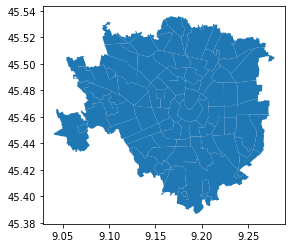

In [ ]:
Quartieri_milano = quartieri
Quartieri_milano.plot()

In [ ]:
ax = Quartieri_milano.plot()
contextily.add_basemap(ax)

Quartieri_milano3857 = Quartieri_milano.to_crs(epsg = 3857)

In [ ]:
ax = Quartieri_milano3857.plot(facecolor = 'None', edgecolor = 'k')
contextily.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.
DA FARE

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/es 11 01/Limiti01012022 (1)/ProvCM01012022")
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Leng,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.826908e+09,593389.667001,"POLYGON ((411015.006 5049970.983, 411070.006 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.081602e+09,458754.449021,"POLYGON ((437900.552 5088796.204, 437915.021 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.340250e+09,276722.284585,"POLYGON ((459146.367 5079451.275, 459180.648 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,6.894828e+09,542063.983810,"MULTIPOLYGON (((378928.552 4958539.163, 378934..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,1.510170e+09,356521.052241,"POLYGON ((423634.299 4998152.373, 423642.986 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,2.260887e+09,316521.773202,"POLYGON ((456874.626 5145767.794, 456879.627 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,4.054079e+08,164691.454327,"POLYGON ((519686.705 5065270.380, 519754.706 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,8.627532e+08,226568.225869,"POLYGON ((885062.265 4803844.694, 885197.764 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,1.542990e+09,276175.124779,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [ ]:
provincia_inserita = input('provincia della Lombardia: ')
if provincia_inserita == province[province['DEN_UTS'] == 'Milano']:
  provincia_inserita.within()
